### TOPIC - IMPLEMENTATION OF DATA ANALYTICS USE CASE USING PYTHON LIBRARIES

INTRODUCTION

The word "cereal" came from the roman goddess of harvest and agriculture Ceres. Which actually makes sense because the cereal that we know today is a type of grass that yields edible grains is cultivated and harvested.
In the early to mid 19th century the American diet for breakfast didn't really contain enough fiber, its mostly meat and protein which caused several digestive problem. 1854 came and a german immigrant by name Ferdinand Schumacher invented the cereals that we know today. He produced them on a hand oats grinder in the back room of his store in Akron, Ohio.And it led him founding his first company named “German Mills American Oatmeal Company” and it will later become Quaker Oats Company.
Today, theres a lot of choice that we pick to include to our daily diet and sometimes people are having a difficult time to decide which to buy. Let's use data science to find that out.

OBJECTIVE

Choose a domain and use case of your choice and implement the following steps of the data analytics process using Python Libraries: 
- Framing the problem
- Dataset extraction
- Data pre-processing
- Exploratory Data Analysis
- Visualization of result.

DESCRIPTION OF THE DATA

The data consists of about 77 cereals manufactured by various companies. Within the dataset, are several information that consumers can use whenever they purchase these products, like serving type, nutrition, ratings, etc.

#### FINDINGS AND DISCUSSIONS

In [1]:
#Importing necessary libraries
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#Assigning variables
manufacturers = {
    'A' : 'American Home Food Products',
    'G' : 'General Mills',
    'K' : 'Kelloggs',
    'N' : 'Nabisco',
    'P' : 'Post',
    'Q' : 'Quaker Oats',
    'R' : 'Ralston Purina',
 }
serving_types = {
    'C': 'cold',
    'H': 'hot',
}
nutrition_list = [
    'calories',
    'protein',
    'fat',
    'sodium',
    'fiber',
    'carbohydrates',
    'sugars',
    'potassium',
    'vitamins'
]

In [3]:
#Re-usatable functions
def change_observation_values(df,list_items,column_name):

    #df_copy = df_item.copy()

    for index, value in list_items.items():
        df.loc[df[column_name] == index, column_name] = value

    return df

def get_observations(df,column):
    
    return pd.Series(df[column]).drop_duplicates().to_list()

def count_observations(list_series,df,column):
    
    return_this = []

    for s in list_series:
        return_this.append( df[column].str.count(s).sum() )
    return return_this

- LOADING THE DATA AND PRINTING SOME GENERAL INFORMATIONS

In [4]:
#Loading the dataset
data=pd.read_csv("cereal.csv")
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [5]:
#Printing column names of the dataset
data.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [6]:
#Printing a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [7]:
#Printing statistical description of the dataset
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [8]:
#Showing if any null values exist in the dataset
data.isnull()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Here, we see that no null values exist in each columns of the dataset

- CLEANING THE DATA

In [9]:
#Changing column names
data = data.rename(columns={"mfr": "manufacturer", "type": "serving_type", "potass":"potassium", 'carbo': 'carbohydrates'})
data.head()

,name,manufacturer,serving_type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [10]:
#Changing manufacturer observersations into readable texts
data = change_observation_values(data,manufacturers,'manufacturer')
data.head()

,name,manufacturer,serving_type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [11]:
#Changing serving_type observersations into readable texts
data = change_observation_values(data,serving_types,'serving_type')
data.head()

,name,manufacturer,serving_type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,cold,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [12]:
#Changing -1 values to 0 (zero)
#Because in real life, we can't have -1 values on the nutrition column
for nl in nutrition_list:
    data.loc[data[nl] == -1, nl] = 0
data.head()

,name,manufacturer,serving_type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,cold,110,2,2,200,1.0,14.0,8,0,25,3,1.0,0.75,34.384843


- EXPLORATORY DATA ANALYSIS OF THE DATASET

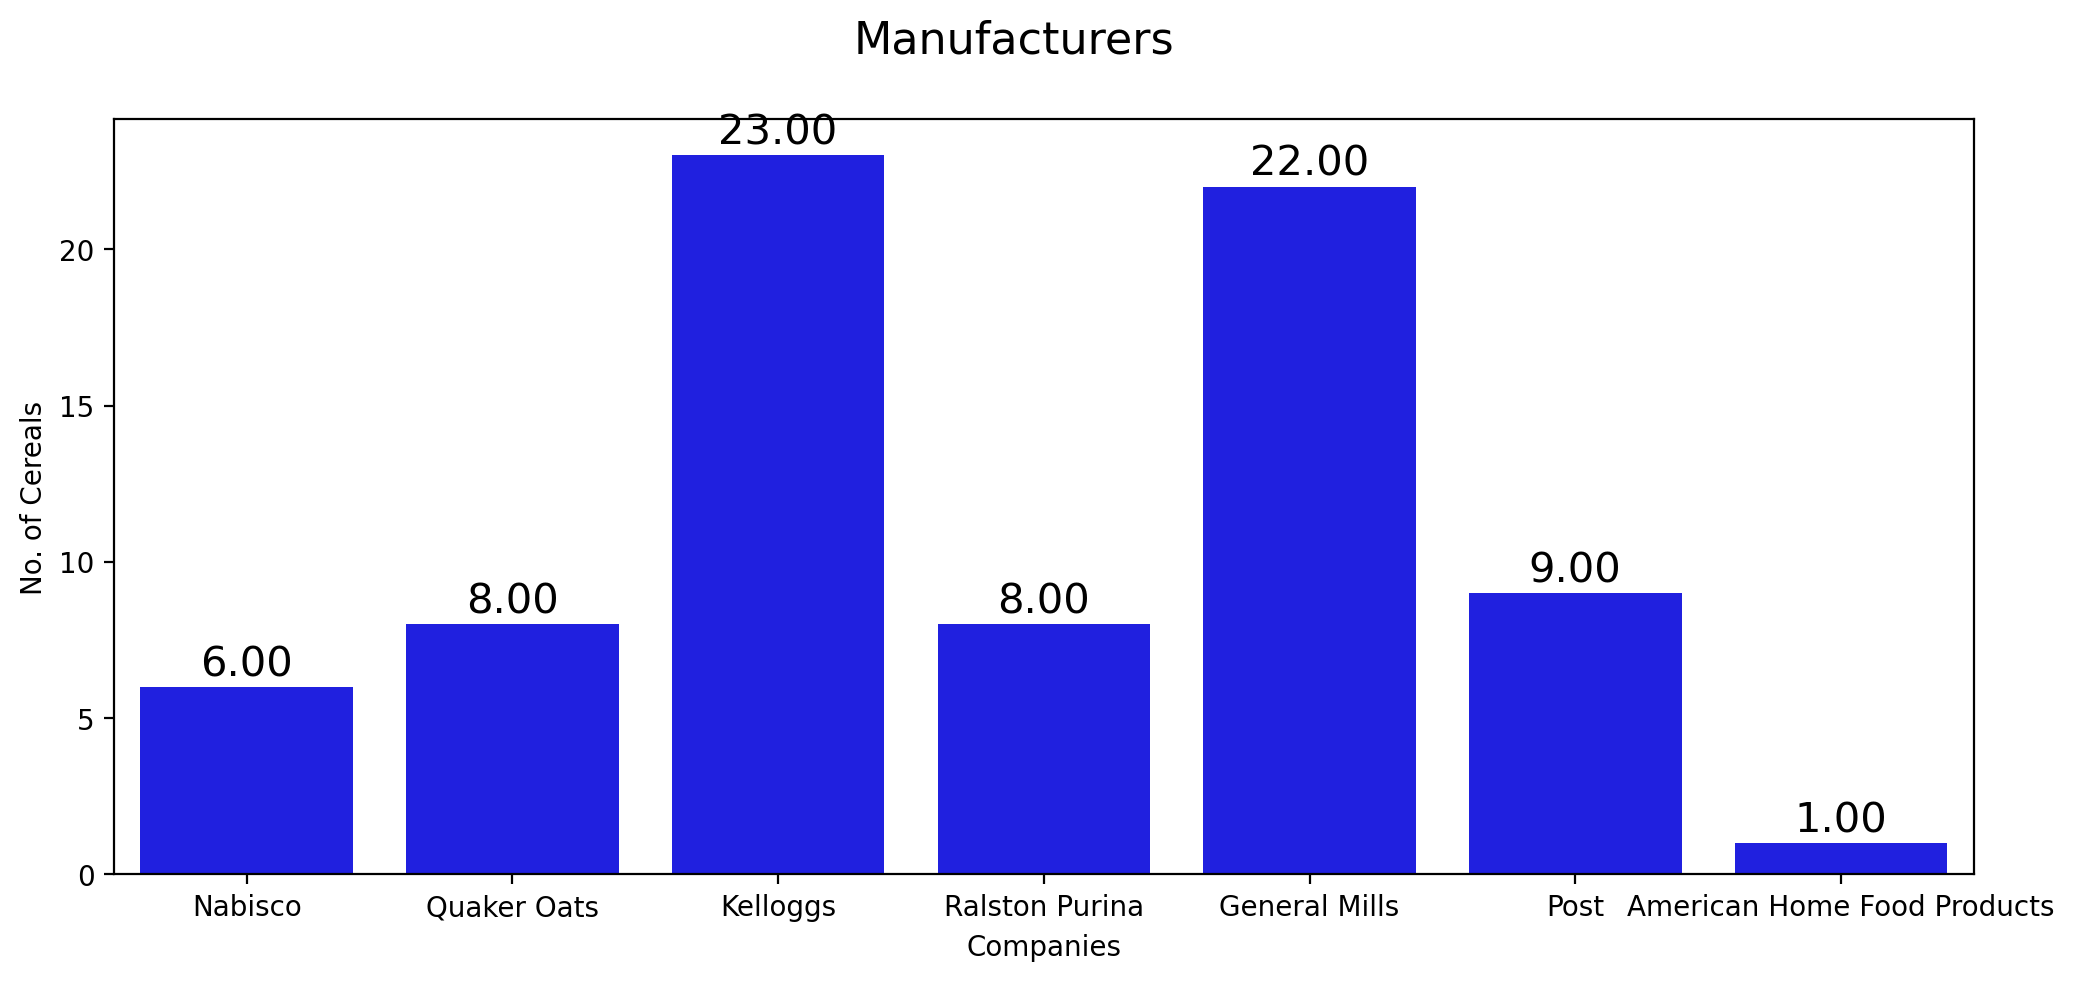

In [13]:
#Number of Cereal Products per Manufacturer
companies = get_observations(data,'manufacturer')
product_count = count_observations(companies,data,'manufacturer')

fig = plt.figure(figsize=(12,5), dpi=200)
fig.suptitle('Manufacturers',fontsize=16)
plots = sns.barplot(y = product_count,x = companies, color='blue')
plt.xlabel('Companies')
plt.ylabel('No. of Cereals')

for bar in plots.patches:
    
    plots.annotate(
        format(bar.get_height(), '.2f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), 
        ha='center', 
        va='center',
        size=15, 
        xytext=(0, 8),
        textcoords='offset points'
    )

plt.show()

Here, we see that the manufacturers produce more of Kelloggs Cereal than any other Cereals mentioned in our dataset.

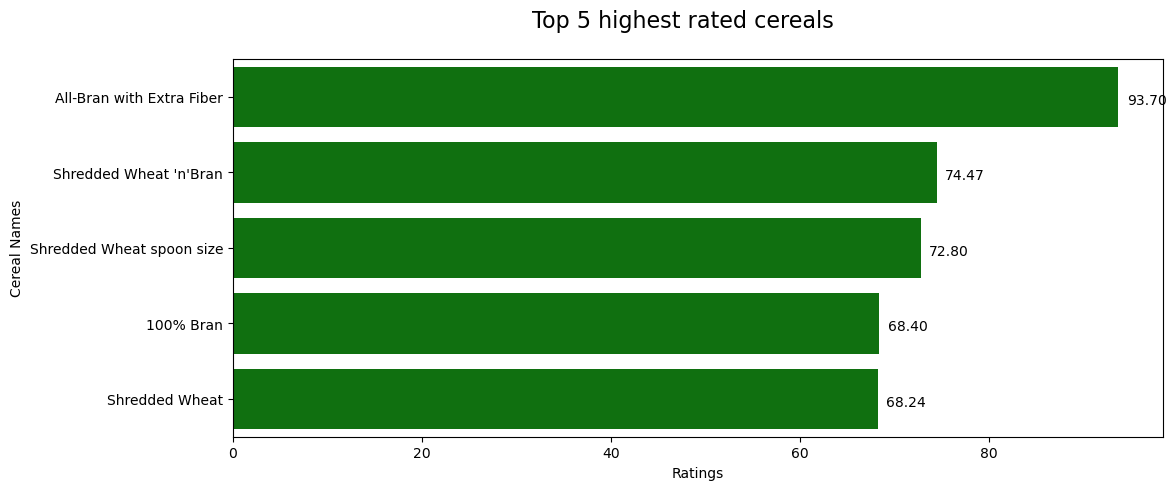

In [14]:
#Top 5 highest rating cereal
data_top_rating = data.sort_values('rating', ascending=False)
data_top_rating = data_top_rating.head(5)

fig = plt.figure(figsize=(12,5), dpi=100)
fig.suptitle('Top 5 highest rated cereals',fontsize=16)
plots = sns.barplot(y = data_top_rating['name'],
                    x = data_top_rating['rating'], color='green')
plt.xlabel('Ratings')
plt.ylabel('Cereal Names')

for p in plots.patches:
    width = p.get_width()
    plt.text(
        3+p.get_width(), 
        p.get_y()+0.55*p.get_height(),
        '{:1.2f}'.format(width),
        size=10,
        ha='center', 
        va='center'
    )
plt.show()

Above, the barplot shows that the All-Bran with Extra Fiber is the 1st in the top 5 highest rated Cereals, then comes Shredded Wheat 'n' Bran, followed by others.

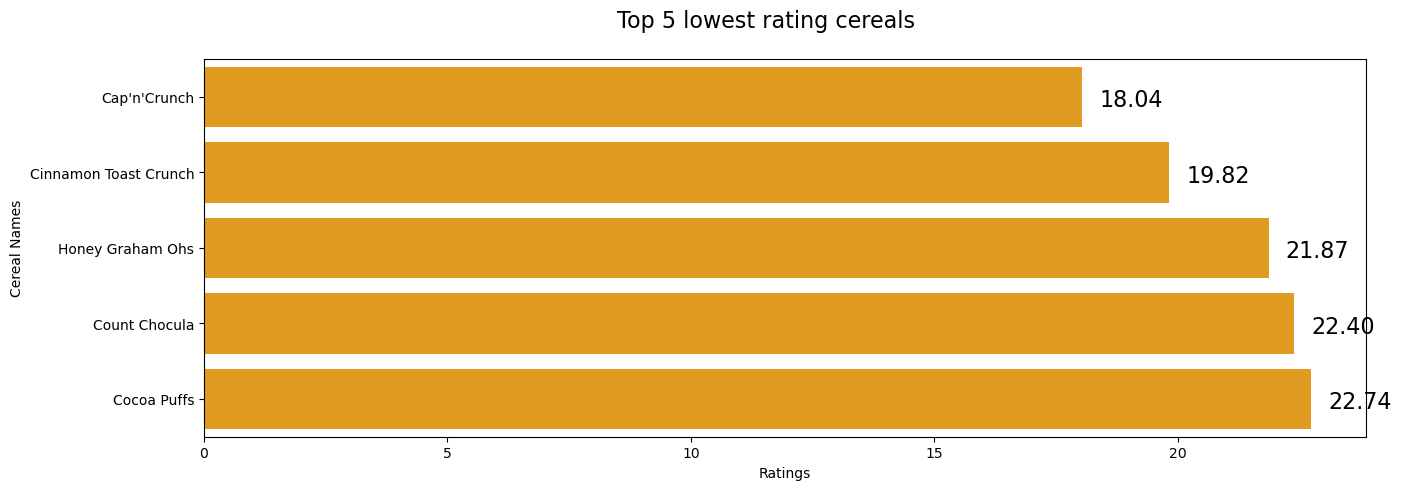

In [15]:
#Top 5 lowest rating cereal
low_ratings = data.sort_values('rating', ascending=True)
low_rating_5 = low_ratings.head(5)

fig = plt.figure(figsize=(15,5), dpi=100)
fig.suptitle('Top 5 lowest rating cereals',fontsize=16)
plots = sns.barplot(y = low_rating_5['name'],
                    x = low_rating_5['rating'], color='orange')
plt.xlabel('Ratings')
plt.ylabel('Cereal Names')

for p in plots.patches:
    width = p.get_width()
    plt.text(
        1+p.get_width(), 
        p.get_y()+0.55*p.get_height(),
        '{:1.2f}'.format(width),
        size=16,
        ha='center', 
        va='center'
    )
plt.show()

Here, we see that the Cereal, Cap'n'Crunch is the most unliked Cereal among all the top 5 lowest rating Cereal.

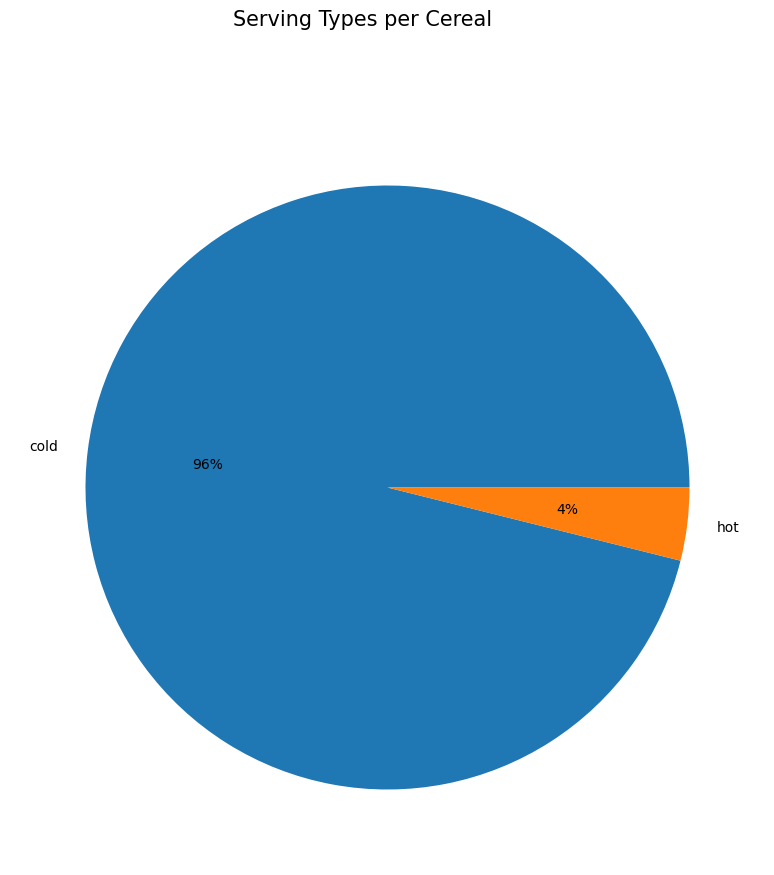

In [16]:
#Printing the serving types per cereal, either cold or hot
#define data
servings = get_observations(data,'serving_type')
servings_count = count_observations(servings,data,'serving_type')

#create pie chart
fig = plt.figure(figsize=(20,10), dpi=100)
fig.suptitle('Serving Types per Cereal',fontsize=15)
#plt.pie(servings_count, labels = servings, colors = colors, autopct='%.0f%%')
plt.pie(servings_count, labels = servings, autopct='%.0f%%')
plt.show()

Here, we see that the serving type for the Cereal is Cold which has the highest amount of percentage, i.e., 96%.

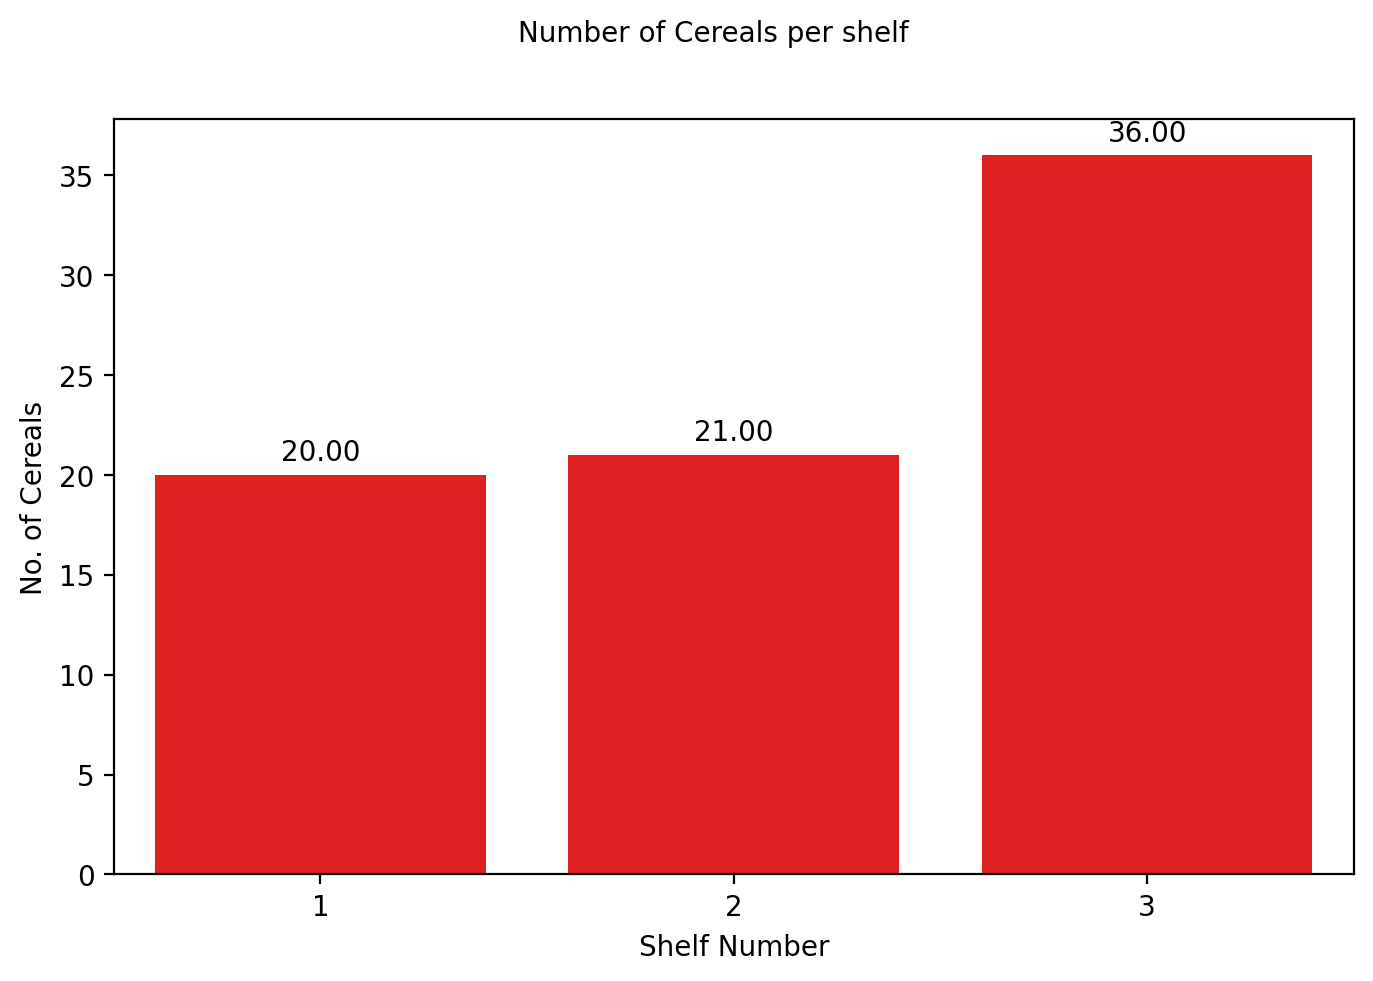

In [17]:
#Number of cereals per shelf
#Defining data
_s = data['shelf'].value_counts()
shelves = _s.index
shelves_count = _s

fig = plt.figure(figsize=(8,5), dpi=200)
fig.suptitle('Number of Cereals per shelf',fontsize=10)
plots = sns.barplot(y = shelves_count,x = shelves, color='red')
plt.xlabel('Shelf Number')
plt.ylabel('No. of Cereals')

for bar in plots.patches:
    
    plots.annotate(
        format(bar.get_height(), '.2f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), 
        ha='center', 
        va='center',
        size=10, 
        xytext=(0, 8),
        textcoords='offset points'
    )
plt.show()

The 3rd shelf has the maximum number of Cereals.

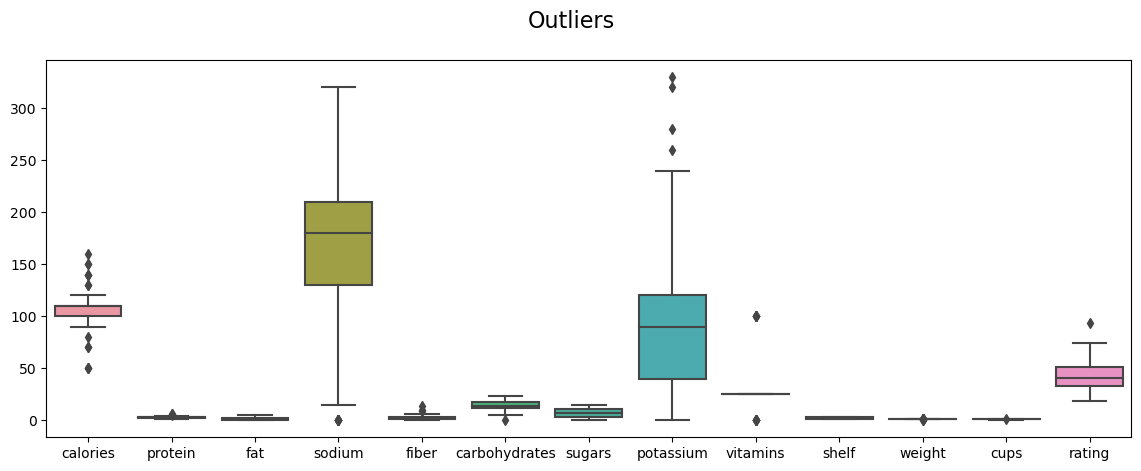

In [18]:
#Showing outliers
fig = plt.figure(figsize=(14,5), dpi=100)
fig.suptitle('Outliers',fontsize=16)
sns.boxplot(data=data)
plt.show()

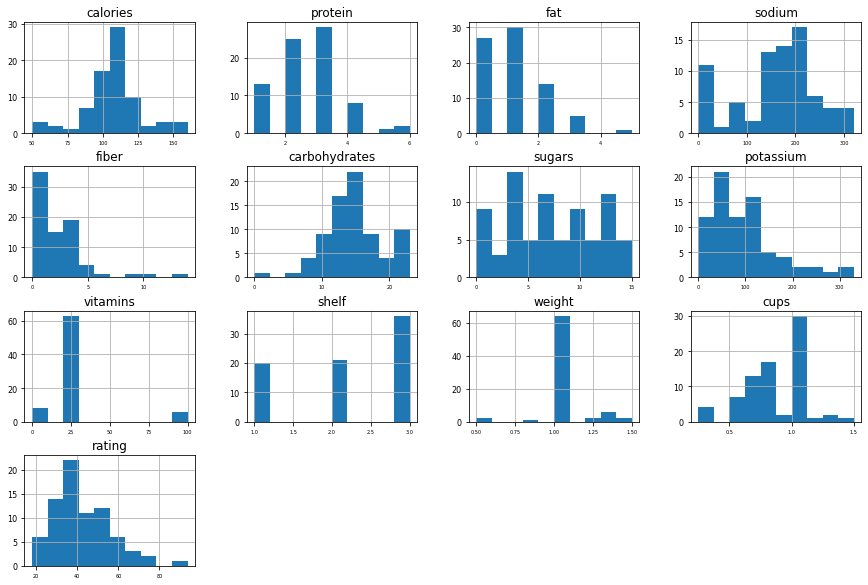

In [19]:
#Showing the nature of the normal distribution between different Cereal
data.hist(figsize=(15, 10), bins=10, xlabelsize=5, ylabelsize=8);

In [20]:
#Stating correlation
data.corr()

,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.252349,0.564092,-0.066678,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.125337,-0.324112,0.549667,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318504,0.275086,0.193371,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.353990,0.096291,-0.032706,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.359297,-0.141225,0.903647,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbohydrates,0.252349,-0.125337,-0.318504,0.353990,-0.359297,1.000000,-0.352835,-0.352861,0.257065,-0.107424,0.136016,0.365930,0.054436
sugars,0.564092,-0.324112,0.275086,0.096291,-0.141225,-0.352835,1.000000,0.022151,0.122000,0.096623,0.452308,-0.034450,-0.761732
potassium,-0.066678,0.549667,0.193371,-0.032706,0.903647,-0.352861,0.022151,1.000000,0.020449,0.360974,0.416439,-0.495357,0.380534
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.257065,0.122000,0.020449,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.107424,0.096623,0.360974,0.299262,1.000000,0.190762,-0.335269,0.025159


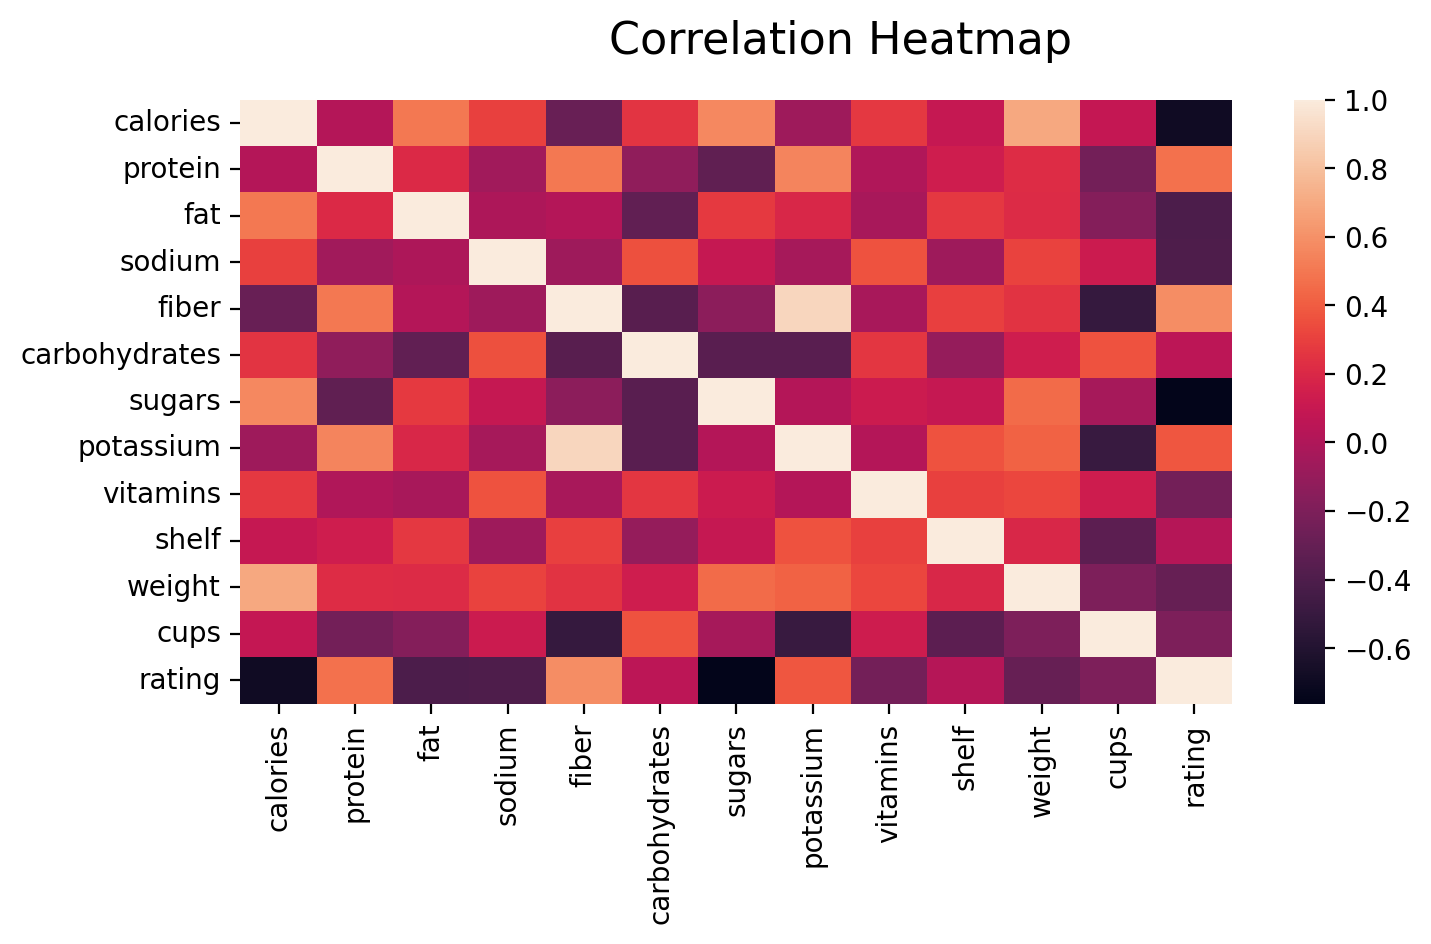

In [21]:
#Plotting the correlation map
fig = plt.figure(figsize=(8,4), dpi=200)
fig.suptitle('Correlation Heatmap',fontsize=16)
sns.heatmap(data.corr())
plt.show()

- HEALTH SCORE COLUMN
We will be creating a health_score column, to rank all cereals according to how healthy they are for consumption. I've created the criteria based on a few articles I've added in the resources section.

Criteria based on multiple sources

calorie < 30g or 55g
protein <= 1g or 2g || close to 10 g
fat <= 2.5 g
sodium <= 140 mg
fiber => 3g or 5g
carbohydrates
sugars < 7g or 6 g
potassium < 100 mg
vitamins > 0,25,100

In [22]:
data['health_score'] = 0

def nutrition_checker(row):
    
    return_score = 0
    if row['calories'] <= 33:
        return_score+=1
    if row['protein'] <= 2:
          return_score+=1
    if row['fat'] <= 2.5:
        return_score+=2
    if row['sodium'] <= 140:
        return_score+=1
    if row['fiber'] >= 5:
        return_score+=2
    if row['carbohydrates'] < 20:
        return_score+=1
    if row['sugars'] < 6:
         return_score+=2
    if row['potassium'] < 100:
        return_score+=1
    if row['vitamins'] > 0:
        return_score+=1
        
    return return_score

data['health_score'] = data.apply(nutrition_checker, axis=1)
data['health_score']

0     7
1     2
2     8
3     9
4     6
     ..
72    7
73    7
74    6
75    6
76    6
Name: health_score, Length: 77, dtype: int64


- FRAMING CERTAIN PROBLEMS

We do this for analyzing our dataset better.
Hence, to get answers to certain problems, we'll look into certain questions that arise.


Question 1.

What is the range of nutrition needed to reach the top rating?

In [23]:
data_q1 = pd.DataFrame()
data_q1['name'] = data_top_rating['name']

for nl in nutrition_list:
    data_q1[nl] = data_top_rating[nl]

data_q1 = data_q1.set_index('name')

nutrition_minmax = []

for nl in nutrition_list:
    nutrition_minmax.append({
        'nutrition': nl, 
        'min': data_q1[nl].min(), 
        'max': data_q1[nl].max()
    })

nutrition_minmax = pd.DataFrame(nutrition_minmax)
nutrition_minmax

,nutrition,min,max
0,calories,50.0,90.0
1,protein,2.0,4.0
2,fat,0.0,1.0
3,sodium,0.0,140.0
4,fiber,3.0,14.0
5,carbohydrates,5.0,20.0
6,sugars,0.0,6.0
7,potassium,95.0,330.0
8,vitamins,0.0,25.0


Here, we have mentioned the exact proportion of nutrients that needs to be present in a Cereal, so that it reaches the top rating in the market.


Question 2. 

Which Cereal is the most healthy regardless of its rating? And which Cereal is the most unhealthy? 

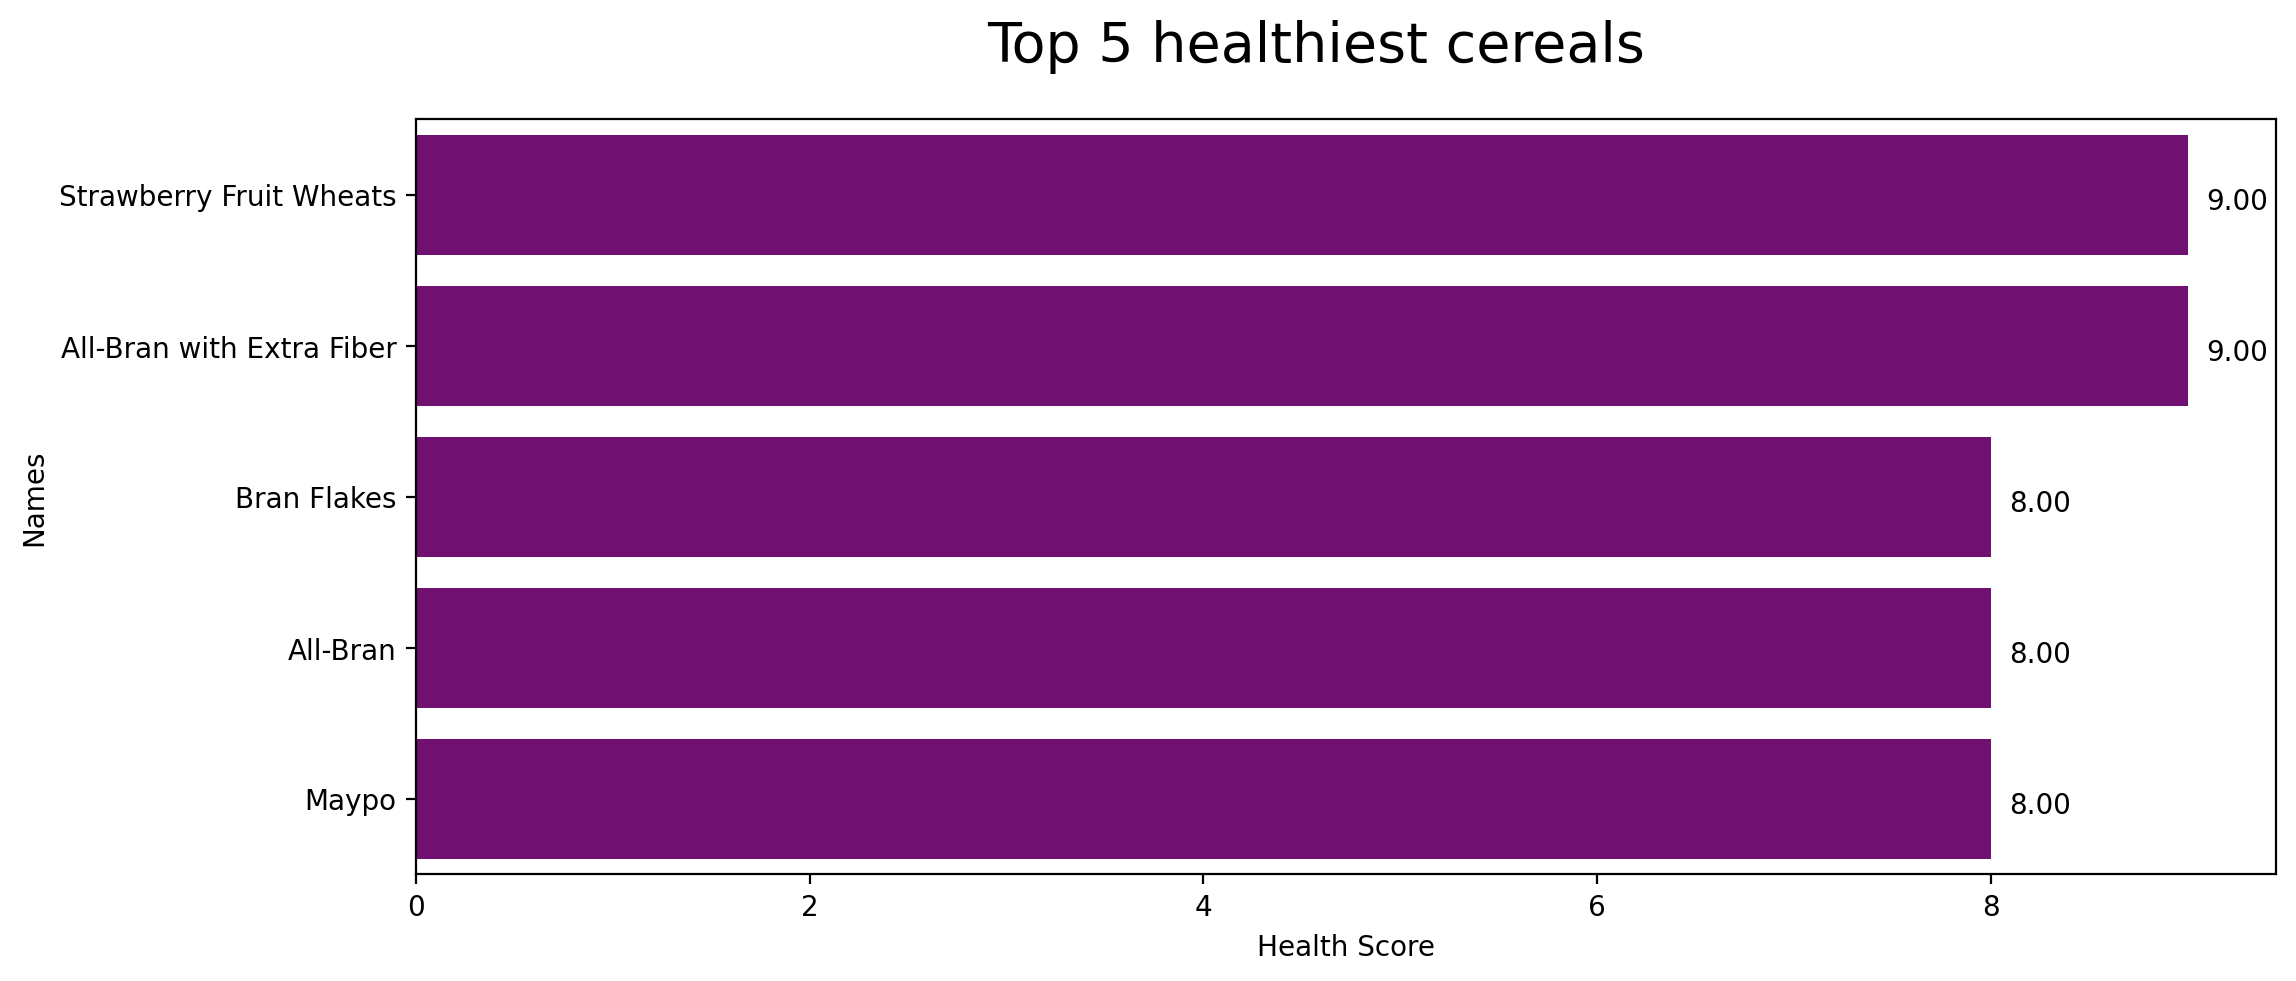

In [24]:
data_healthy = data.sort_values('health_score', ascending=False)
data_healthy = data_healthy.head(5)

fig = plt.figure(figsize=(12,5), dpi=200)
fig.suptitle('Top 5 healthiest cereals',fontsize=20)
plots = sns.barplot(y = data_healthy['name'],
                    x = data_healthy['health_score'], color='purple')
plt.xlabel('Health Score')
plt.ylabel('Names')

for p in plots.patches:
    width = p.get_width()
    plt.text(
        0.25+p.get_width(), 
        p.get_y()+0.55*p.get_height(),
        '{:1.2f}'.format(width),
        size=10,
        ha='center', 
        va='center'
    )
plt.show()

Here, we conclude that Strawberry Fruit Wheats and All-Bran with Extra Fiber has the same health score, i.e., 9.00, which is the most healthy ones and then is followed by Bran Flakes, All-Bran and Maypo which again has the same health score, i.e., 8.00. Therefore, Cereals with health score 9.00 is the healthiest and the one with health score 8.00 is less healthy.

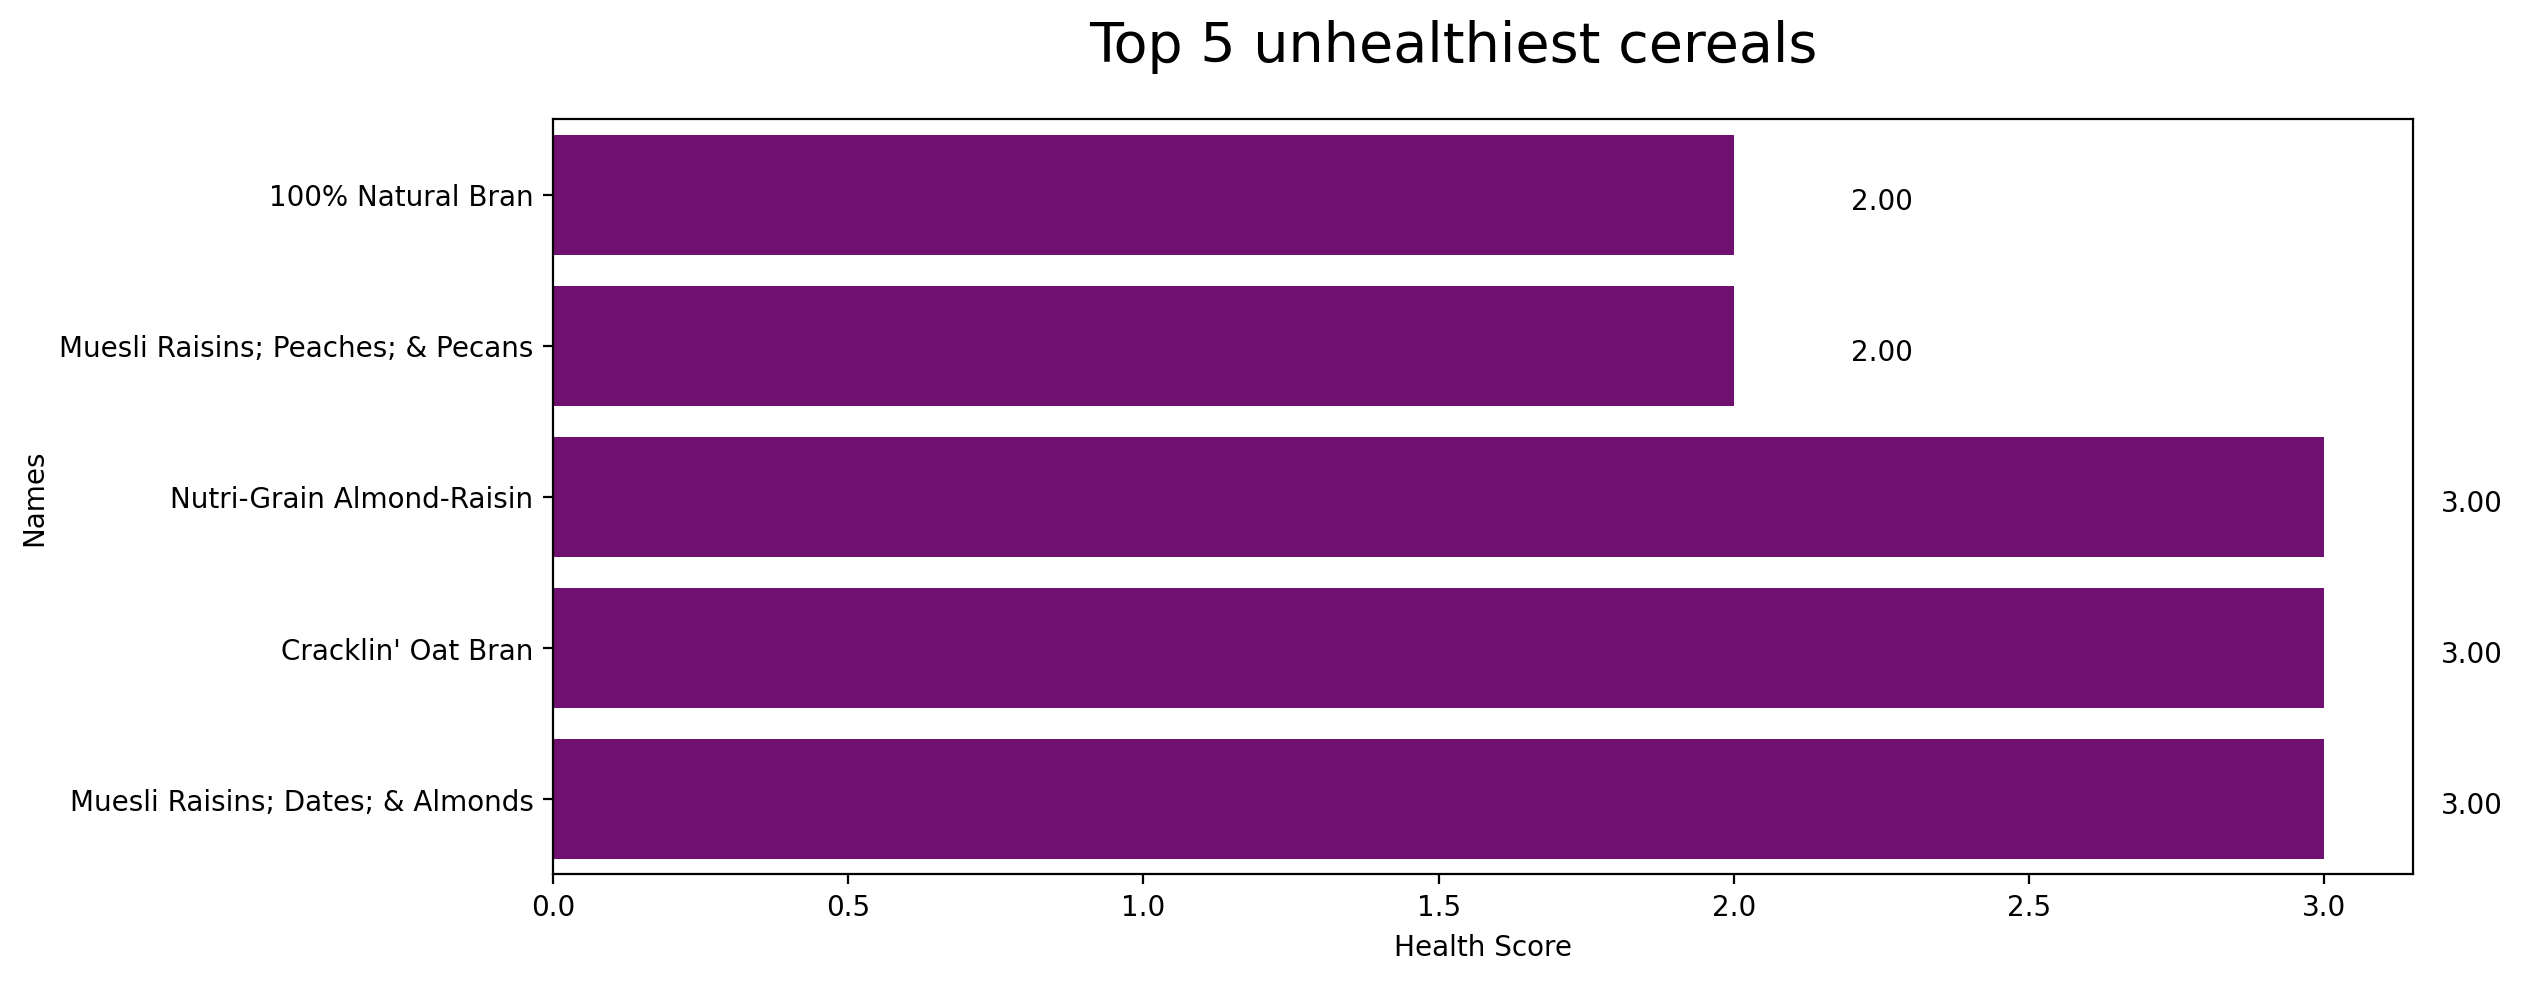

In [25]:
data_unhealthy = data.sort_values('health_score', ascending=True)
data_unhealthy = data_unhealthy.head(5)

fig = plt.figure(figsize=(12,5), dpi=200)
fig.suptitle('Top 5 unhealthiest cereals',fontsize=20)
plots = sns.barplot(y = data_unhealthy['name'],
                    x = data_unhealthy['health_score'], color='purple')
plt.xlabel('Health Score')
plt.ylabel('Names')

for p in plots.patches:
    width = p.get_width()
    plt.text(
        0.25+p.get_width(), 
        p.get_y()+0.55*p.get_height(),
        '{:1.2f}'.format(width),
        size=10,
        ha='center', 
        va='center'
    )
plt.show()

Here, we conclude that 100% natural Bran and Muesli Raisins; Peaches; & Pecans has the same health score, i.e., 2.00, which is the most unhealthy ones and then is followed by Nutri-Grain Almond-Raisin, Cracklin' Oat Bran and Muesli Raisins; Dates; & Almonds which again has the same health score, i.e., 3.00. Therefore, Cereals with health score 2.00 is the most unhealthy and the one with health score 3.00 is a little less unhealthy.


Question 3. 

Does having a high rating correlate to being the healthiest Cereal in the dataset?

In [26]:
data_corr2 = pd.DataFrame()
data_corr2['name'] = data['name']
data_corr2['shelf'] = data['shelf']
data_corr2['rating'] = data['rating']
data_corr2['health_score'] = data['health_score']
data_corr2.corr()

,shelf,rating,health_score
shelf,1.000000,0.025159,-0.169713
rating,0.025159,1.000000,0.392920
health_score,-0.169713,0.392920,1.000000


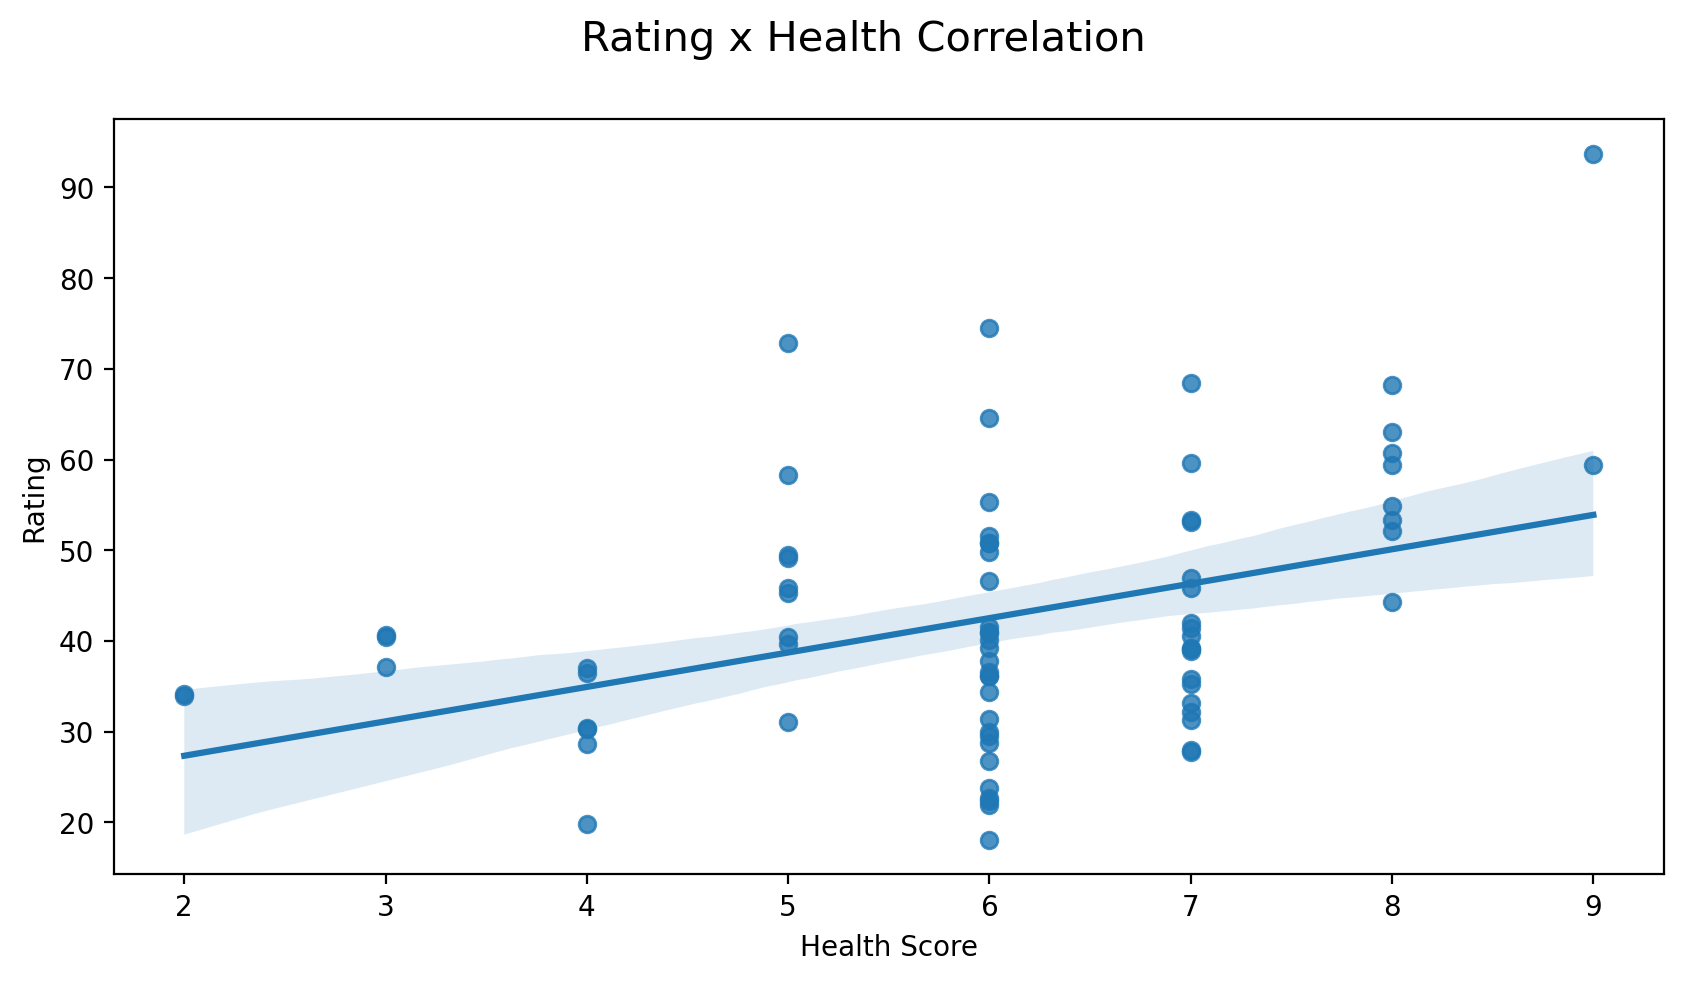

In [27]:
fig = plt.figure(figsize=(10,5), dpi=200)
fig.suptitle('Rating x Health Correlation',fontsize=15)
plots = sns.regplot(x="health_score", y="rating", data=data_corr2);
plt.xlabel('Health Score')
plt.ylabel('Rating')
plt.show()

This depicts that rating and health score has a positive correlation, i.e., if the health score for the Cereal increases, the rating for it will also increase. Same is for the reverse case which answers are question as to whether having a high rating correlate to being the healthiest Cereal in the dataset, i.e., yes it correlates.


Question 4. 

What is the percentage of healthy and unhealthy Cereal?

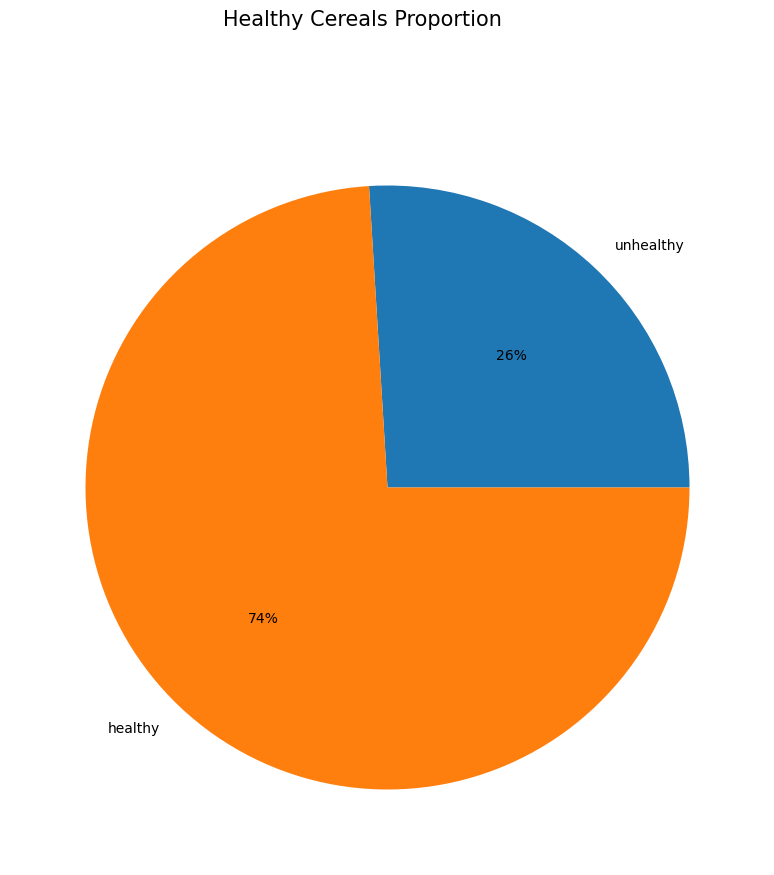

In [28]:
#Define data
unhealthy_cereals = data['health_score'].loc[data['health_score'] < 6]
unhealthy_count = unhealthy_cereals.count()

healthy_cereals = data['health_score'].loc[data['health_score'] > 5]
healthy_count = healthy_cereals.count()

#create pie chart
fig = plt.figure(figsize=(20,10), dpi=100)
fig.suptitle('Healthy Cereals Proportion',fontsize=15)
#plt.pie(servings_count, labels = servings, colors = colors, autopct='%.0f%%')
plt.pie([unhealthy_count,healthy_count], labels = ['unhealthy','healthy'], autopct='%.0f%%')
plt.show()

Now, this depicts that the proportion for healthy Cereal is far more than the unhealthy Cereal, i.e., there is 74% of healthy Cereal and 26% of unhealthy Cereal.




- CONCLUSION

The actual number of the cereals are only 77 and not 80.

We found out the range of nutrition that the top rated cereals have. That could mean if a new product comes out and its nutrition content is within that range, it has a greater chance of acquiring a high rating. But having a high rating does not necessarily mean it is healthy, theres only 39% correlation. Also the shelf placement doesnt mean anything to a cereal being healthy. 74% of the cereals from the dataset are considered healthy for consumption.

Shelf 1 has the lowest number of cereals while shelf 3 has the highest number. Shelf 1 has the highest rating on average, might be due to having low number of cereals displayed.



- REFERENCES

http://www.historyofcereals.com/

https://cspinet.org/tip/five-things-check-you-buy-breakfast-cereal

https://health.clevelandclinic.org/how-to-pick-a-healthy-cereal/

https://www.healthline.com/nutrition/are-breakfast-cereals-healthy#tips

https://www.verywellfit.com/how-to-choose-a-breakfast-cereal-2506602

https://www.kidney.org/newsletter/choosing-right-breakfast-cereal-ckd#:~:text=Choose%20cereals%20under%20100%20mg,are%20often%20a%20better%20buy.

https://www.todaysdietitian.com/newarchives/121112p30.shtml#:~:text=%E2%80%9CIt's%20important%20for%20consumers%20to,5%20g%2C%E2%80%9D%20Crandall%20says.